# Generic ALP realignment

In [59]:
%run observables.py
%run runner.py

## Parameter space from paper

In [60]:
data = load_data("realignment", 1)

In [70]:
def plot(data, f_a):
    eta = data["eta"]
    m_a = data["m_a"]
    Gamma_inf = data["Gamma_inf"]
    H_inf = data["H_inf"]
    H_inf_index = 0
    f_a_index = 0
    
    if f_a is None:
        f_a = data["f_a"][f_a_index]
        dilution = data["dilution"]
    else:
        rho_end_rad = data["rho_end_rad"]
        rho_end_axion = data["rho_end_axion"]
                
        f_a_used = data["f_a"][f_a_index]

        dilution = np.array(
            [[compute_dilution_factor_from_axion_decay(10.0, 
                rho_end_rad[H_inf_index, i, j, f_a_index], 
                rho_end_axion[H_inf_index, i, j, f_a_index] / f_a_used**2 * f_a**2, 
                (m_a[j],), f_a, axion_motion.realignment_axion_field, False)
             for i in range(len(Gamma_inf))] for j in range(len(m_a))]
        )
    
    eta_B = np.abs(dilution * eta)
    
    plt.figure()
    plt.contour(m_a, Gamma_inf, np.log10(eta_B[H_inf_index, :, :, f_a_index] / eta_B_observed))
    plt.xscale("log")
    plt.yscale("log")
    plt.colorbar(label=r"$log_{10}(\eta_B / \eta_B^\mathrm{obs})$")
    plt.xlabel("$m_a$ / GeV")
    plt.ylabel(r"$\Gamma_\mathrm{inf}$ / GeV")
    plt.title(f"f_a = {f_a:.2e}, H_inf = {H_inf[H_inf_index]:.2e}")

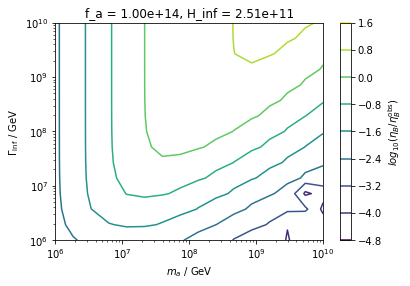

In [73]:
plot(data, 1e14)

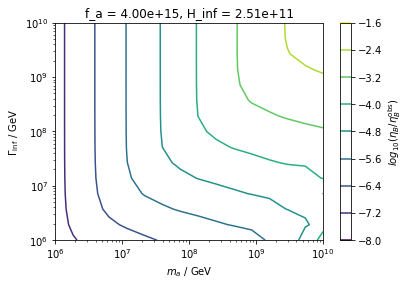

In [72]:
plot(data, None)

## Example Evolution 

conv factor: 1.0
step = 1
T_max = 7.922964e+11
t_eq = nan
tmax_inf_time = 1.0, tmax_axion_time = 1.0
calculcated initial integration time:
tmax_inf_time = 1.0 tmax_axion_time = 1.0
rh: 0.01878833770751953
axion: 0.012080907821655273
transport eq.: 0.04750370979309082
B-L start .. end: 0.0 -8.3349958129319e-10
B-L range: -8.3349958129319e-10 0.0
delta = 3.6364889944851795 rtol_asym = 0.001
step = 2
rh: 0.0023033618927001953
axion: 0.007816314697265625
transport eq.: 0.12083911895751953
B-L start .. end: -8.334995812932033e-10 -7.703619371129407e-09
B-L range: -8.326374806981949e-09 -8.334995812932033e-10
delta = 1.3616542062371086 rtol_asym = 0.001
step = 3
rh: 0.0013031959533691406
axion: 0.0075190067291259766
transport eq.: 0.12091779708862305
B-L start .. end: -7.703619371129393e-09 -7.653466027938735e-09
B-L range: -7.707473943579845e-09 -7.619314480576914e-09
delta = 0.011509514424714805 rtol_asym = 0.001
step = 4
rh: 0.0009584426879882812
axion: 0.007006645202636719
transport eq.:

(6.632569678412633e-11,
 0.9963653850443863,
 7.688924193049376e+44,
 6.820370924542715e+33,
 0.0,
 1.0)

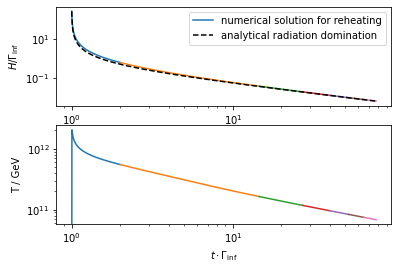

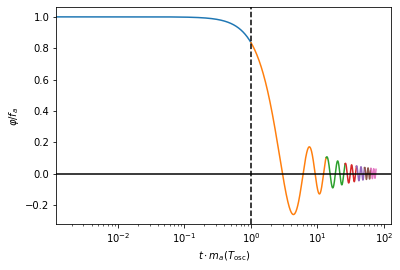

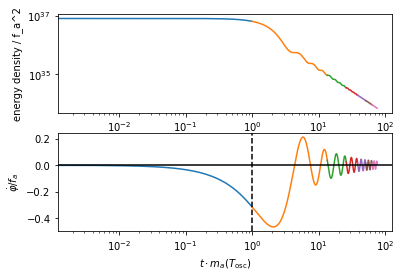

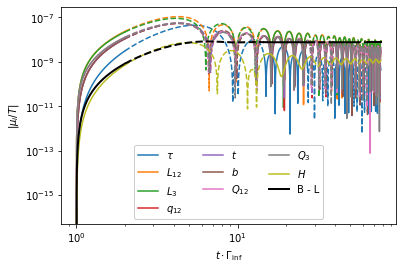

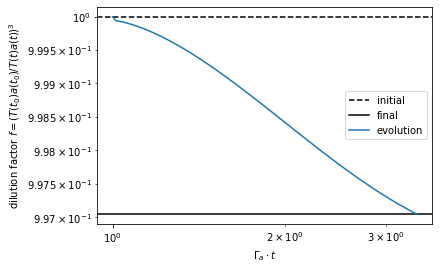

In [40]:
%run observables.py
f_a = 4e12
Gamma_inf = 1e6
m_a = 1e6
H_inf = f_a*2*np.pi*1e-5
compute_observables(H_inf, Gamma_inf, (m_a,), f_a, 
                    axion_motion.realignment_axion_field, (1.0, 0.0),
                    calc_init_time=True, debug=True)

/tmp/ipykernel_874738/2174062644.py:25: RuntimeWarning: invalid value encountered in double_scalars
  sum(transport_equation.charge_vector[alpha, i] * gamma[alpha] * source_vector[alpha] *


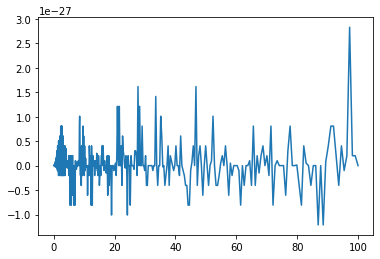

In [43]:
%run observables.py

scale = decay_process.find_scale(Gamma_inf)
axion_model = axion_motion.realignment_axion_field
axion_parameter = (m_a,)
energy_scale = axion_model.find_dynamical_scale(*axion_parameter)
conv_factor = Gamma_inf / energy_scale
source_vector = transport_equation.source_vector_weak_sphaleron
tmax_axion = 100.0
sol_rh, T_and_H_fn, T_and_H_and_T_dot_fn, sol_axion, axion_source, sol_transp_eq, tmax_axion_time = \
    solve_system(0.0, 3*decay_process.M_pl**2*H_inf**2, (1.0, 0.0), np.zeros(transport_equation.N),
                 tmax_axion, conv_factor, Gamma_inf, scale, 
                 axion_parameter, axion_model, source_vector,
                 False, False)
tmax_inf = tmax_axion * conv_factor
tinfs = np.geomspace(decay_process.t0, decay_process.t0 + tmax_inf, 500)
taxs = (tinfs - decay_process.t0) / conv_factor
Ts, Hs = T_and_H_fn(tinfs)
theta_dots = sol_axion.sol(taxs)[1, :]
theta = sol_axion.sol(taxs)[0, :]

gammas = [transport_equation.calc_rate_vector(T) for T in Ts]

S = [
sum(transport_equation.charge_vector[alpha, i] * gamma[alpha] * source_vector[alpha] * 
transport_equation.charge_vector_B_minus_L[i] * theta_dot / (T*H)
    for i in range(transport_equation.N) for alpha in range(transport_equation.N_alpha))
for gamma, theta_dot, T, H in zip(gammas, theta_dots, Ts, Hs)]
plt.plot(taxs, S)

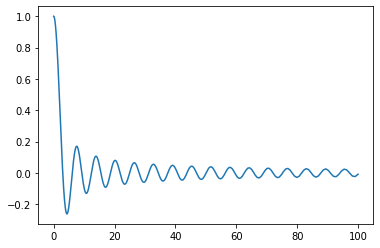

In [44]:
plt.plot(taxs, theta)

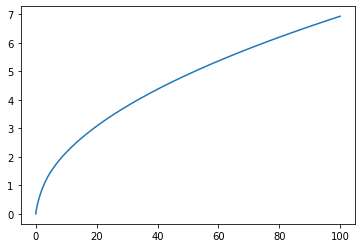

In [45]:
plt.plot(taxs, np.array([source_vector @ gamma for gamma in gammas]) / Hs)

/tmp/ipykernel_874738/1672573666.py:1: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(taxs, theta_dots / Ts)


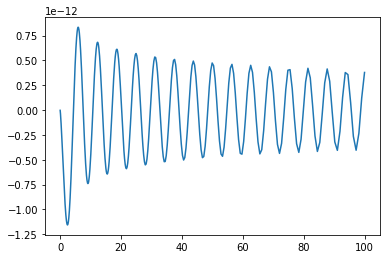

In [46]:
plt.plot(taxs, theta_dots / Ts)